In [269]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob

import pandas as pd
import seaborn as sns
from scipy import fftpack
import scipy as sp
from scipy.signal import windows

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.HRVanalysis as ha
import brainsignal.bodediagram as bd

# This makes the plots appear inside the notebook
%matplotlib inline

#### Sinus generation

Text(0, 0.5, 'Amplitude')

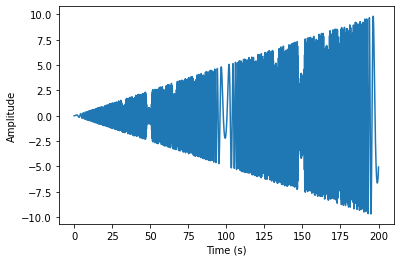

In [363]:
# sinus generation 

spantime=dg.generate_time(duration=200,samplingrate=10)
a=np.linspace(0,10,2001)
ph=np.linspace(0,100,2001)
freq=np.linspace(0,10,2001)
signal=dg.generate_sinus(spantime, amplitude=a, frequency=freq, phase=ph)

plt.plot(spantime, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

This sinus will be our input signal.

#### Define a transfer function 

Let's choose a tranfer function of second order : 

$$ H(s)= \frac{s²+0.2s+0.3}{s²+2s+0.1}$$

In [527]:
# get frequency vector 
fth=bd.find_freq_vect(spantime)
# pulsation initialization 
w=2*np.pi*fth
# 
s=1.0j*w

In [528]:
# transfer function
Hjw=(1)/(s**2+0.2*s+)

#### Bode diagram

##### Bode diagram with our function 

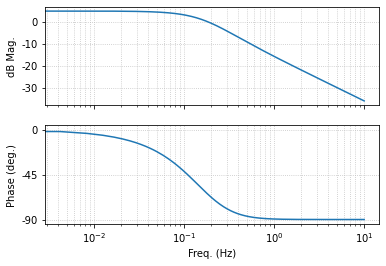

In [529]:
dB_magth ,phaseth = bd.find_dB_mag_and_phase(Hjw)

#Bode plot 
bd.bode_plot(fth, dB_magth, phaseth)

##### Bode diagram with scipy function 

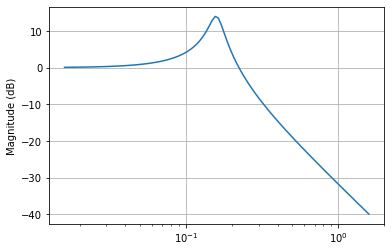

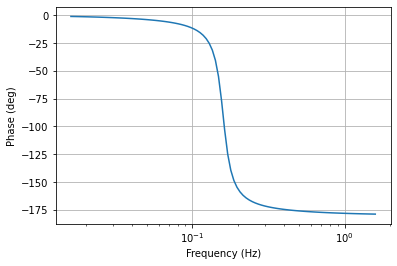

In [539]:
num=[1]
den=[1,0.2,1]
sys=sp.signal.TransferFunction(num,den)
w, magscipy, phasescipy=sp.signal.bode(sys)

fscipy=w/(2*np.pi)

#Bode plot 
plt.figure()
plt.semilogx(fscipy, magscipy) # Bode magnitude plot
plt.ylabel('Magnitude (dB)')

plt.grid()
plt.figure()
plt.semilogx(fscipy, phasescipy)  # Bode phase plot
plt.ylabel('Phase (deg)')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.show()

In [531]:
len(w)

100

#### Output 

We know that Y(s)=H(s).X(s)

In [532]:
# calculation of discrete fourier transform of the input signal 
X=fftpack.fft(signal)

# multiplication 
Y=Hjw*X

# inverse FFT 
output=np.real(fftpack.ifft(Y))

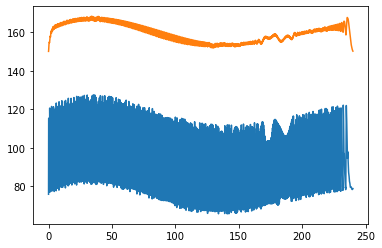

In [533]:
plt.plot(spantime,signal, label='x(t)')
plt.plot(spantime,output, label='y(t)')

#### Transfer function identified

In [534]:
# fft 

#input 
X=fftpack.fft(signal)

#output 
Y=fftpack.fft(output)

#transfer function 
H=Y/X

# The corresponding frequencies
sample_freq = fftpack.fftfreq(signal.size, d=spantime[1]-spantime[0])

dB_mag ,phase = bd.find_dB_mag_and_phase(H)

##### Bode diagram 

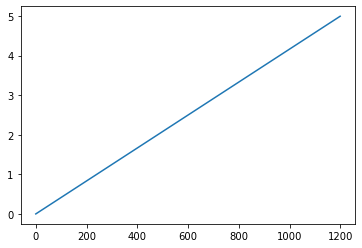

In [535]:
import math
sample_freq
N=len(sample_freq)
Nlim=math.floor(N/2)
plt.plot(sample_freq[0:Nlim])

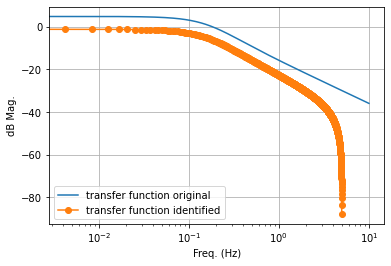

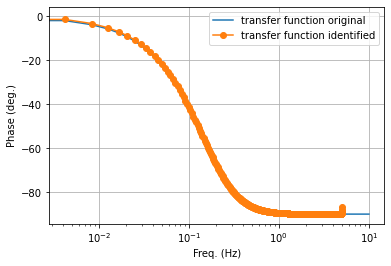

In [536]:
#Gain 
plt.figure()
plt.semilogx(fth, dB_magth,'-', label='transfer function original')
plt.semilogx(sample_freq[0:Nlim], dB_mag[0:Nlim], '-o', label='transfer function identified')
plt.xlabel('Freq. (Hz)')
plt.ylabel('dB Mag.')
plt.grid()
plt.legend()

#Phase
plt.figure()
plt.semilogx(fth, phaseth, label='transfer function original')
plt.semilogx(sample_freq[0:Nlim], phase[0:Nlim], '-o',label='transfer function identified')
plt.ylabel('Phase (deg.)')
plt.xlabel('Freq. (Hz)')
plt.grid()
plt.legend()

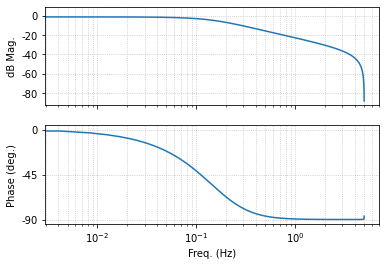

In [537]:
plt.figure()
bd.bode_plot(sample_freq[0:Nlim], dB_mag[0:Nlim], phase[0:Nlim])

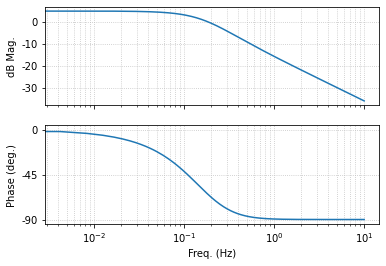

In [538]:
bd.bode_plot(fth, dB_magth,phaseth)

In [519]:
len(phaseo)

100

#### Blood parameters variation from data points

[  0  60 120 180 240]


Text(0, 0.5, 'amplitude')

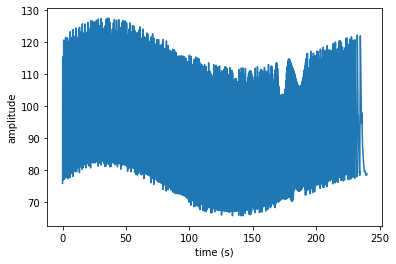

In [495]:
# Blood paramters variation from data points
# time points 
duration=60*4 #s
rate=10 # Hz
spantime=dg.generate_time(duration,rate)

# datapoints
datatimes=np.array([0,1,2,3,4])*60 # sec #todo : try without np.array() and print the variable : what happens ?
print(datatimes)
dataPsys=np.array([121,125,113,115,123])
dataPdia=np.array([75,78,66,70,78])
dataHB=np.array([79,75,63,75,77])/60  # Hz

# fit a smooth function to the data
from scipy.interpolate import InterpolatedUnivariateSpline
##Psys interpolation
Psys=InterpolatedUnivariateSpline(datatimes,dataPsys)

##Pdia interpolation 
Pdia=InterpolatedUnivariateSpline(datatimes,dataPdia)

##HB interpolation 
HB=InterpolatedUnivariateSpline(datatimes, dataHB)

# generate a blood pressure signal with the fitted varying paramters
signal=dg.generate_ABP(spantime,Psys(spantime),Pdia(spantime),HB(spantime))
plt.figure()
plt.plot(spantime,signal)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

Let's use the same transfer function than before.